In [2]:
import  matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.ticker as mtick
from matplotlib import ticker
from matplotlib.ticker import FormatStrFormatter
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")

In [3]:
data=pd.read_csv(r'model_results.csv',sep=',').iloc[:,0:]#transfer_results.csv'

In [4]:
colour = sns.color_palette('Accent', 15)
colour2 = sns.color_palette('Set1', 15)#sns.color_palette("Set1", 15)
deep=0
machine=4
alpha=0.5
model_for=[ "MLP","LSTM","GRU","SGD", "RF", "LASSO",]
index=[3,2,0,5,4,1]

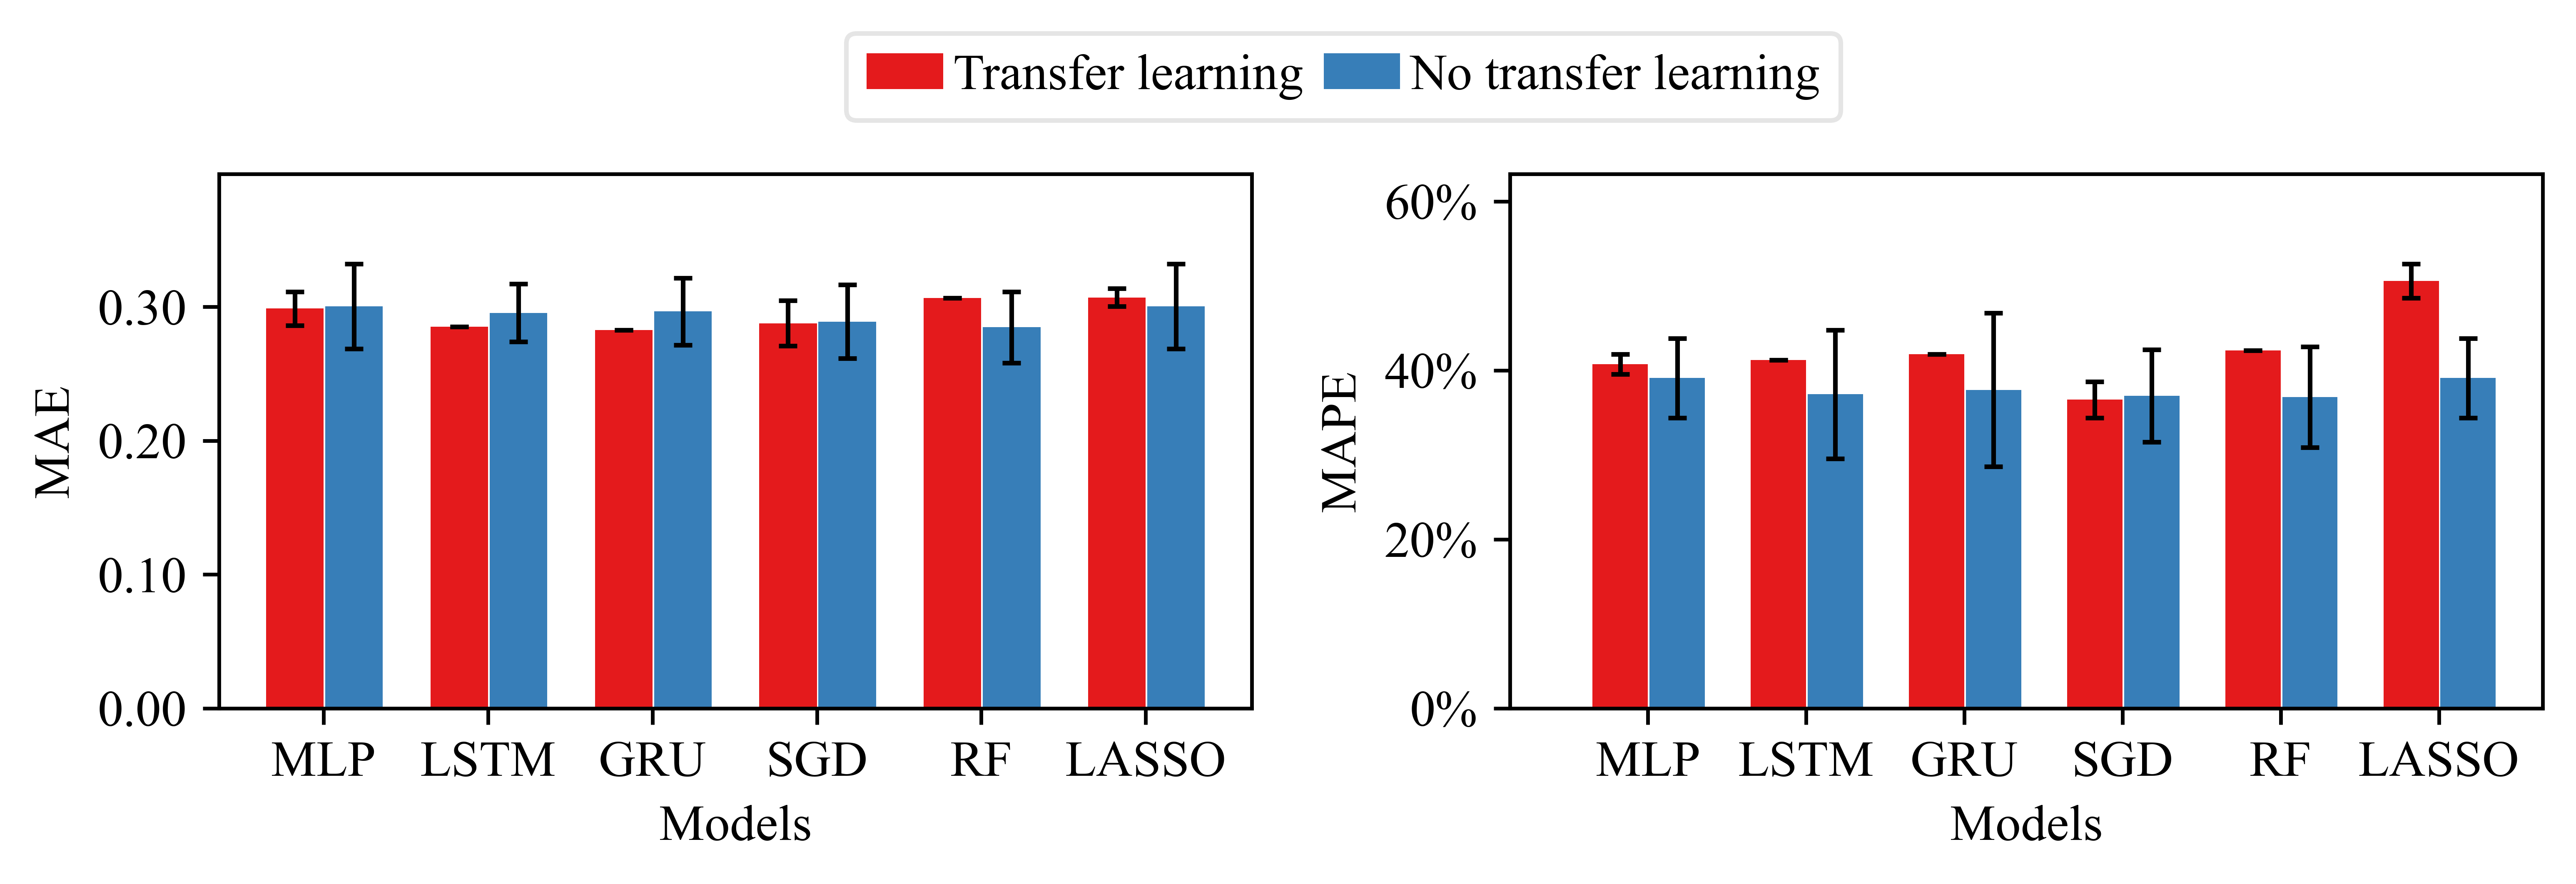

In [5]:
# Transfer Learning and no transfer learning
def data_wo_mean( metrics ):
    data_wo=data[data['source \ target']=='wo_trans']
    data_wo_metric=data_wo[data_wo['metric']==metrics].groupby( "model").agg([np.mean])
    return np.mean(data_wo_metric.iloc[:,1:],axis=1)[index]

def data_wo_std( metrics ):
    data_wo=data[data['source \ target']=='wo_trans']
    data_wo_metric=data_wo[data_wo['metric']==metrics].groupby( "model").agg('std')
    return np.mean(data_wo_metric.iloc[:,1:],axis=1)[index]    

def data_trans_meanorstd( metrics, meanorstd):
    data_trans_Meanorstd2=[]
    data_trans_Meanorstd3=[]
    data21=data[data['source \ target']!='wo_trans'] 
    data32=data21[data21['metric']==metrics ]
    for model in model_for:
        data_trans_meanorstd=[]
        data_model=data32[data32['model']==model]
        for i in range(1,25):
            data33=np.array(data_model[data_model['trainlen']==i].iloc[:,4:])
            data_trans = data33[~np.eye(data33.shape[0],dtype=bool)].reshape(data33.shape[0],-1)
            data_trans_meanorstd.append(np.mean(data_trans))
        data_trans_Meanorstd2.append(np.mean(data_trans_meanorstd))
        data_trans_Meanorstd3.append(np.std (data_trans_meanorstd))
    if meanorstd=='mean':
        return data_trans_Meanorstd2
    else:
        return data_trans_Meanorstd3
        
#Figure
size=12
fig=plt.figure(figsize=(9,5), dpi=800)
plt.rc('font',family='Times New Roman', size=11)
plt.subplots_adjust(left=None,bottom=None,right=None,top=None,wspace=0.25,hspace=0.4)
error_params1=dict(elinewidth=1,ecolor="black",capsize=2)
color=[colour[deep],colour[deep],colour[machine],colour[machine],colour[machine],colour[machine]]
bar_width = 0.35
size=14
bar_1 = list(range(len((model_for))))
bar_2 = [i+bar_width+0.01 for i in bar_1]

################################# Figure 1 ################################
ax=plt.subplot(2,2,1)
plt.bar(bar_1,data_trans_meanorstd( 'mae','mean'),yerr=data_trans_meanorstd( 'mae','std'),
        width=bar_width,error_kw=error_params1,color=colour2[0],alpha=1)
plt.bar(bar_2,data_wo_mean('mae'),width=bar_width,yerr=data_wo_std('mae'), #hatch="xxxxx", linewidth=0.5, edgecolor='black',     
        error_kw=error_params1,color=colour2[1],alpha=1)
plt.xticks([])
plt.ylabel('MAE')
plt.xlabel("Models")
plt.ylim(0,np.max(data_trans_meanorstd( 'mae','mean'))*1.3)
plt.xticks([i+bar_width/2 for i in bar_1],model_for) 
plt.gca().yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2f'))

################################# Figure 2 ################################
ax=plt.subplot(2,2,2)
plt.bar(bar_1,data_trans_meanorstd( 'mape','mean'),yerr=data_trans_meanorstd( 'mape','std'),
        width=bar_width,error_kw=error_params1,color=colour2[0],alpha=1)
plt.bar(bar_2,data_wo_mean('mape'),width=bar_width,yerr=data_wo_std('mape'), 
        error_kw=error_params1,color=colour2[1],alpha=1)
plt.xticks([i+bar_width/2 for i in bar_1],model_for) 
plt.ylabel('MAPE')
plt.xlabel("Models")
plt.ylim(0,np.max(data_trans_meanorstd( 'mape','mean'))*1.25)  
plt.gca().yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals=0))
#for labels
plt.bar(0,0.0, color=colour2[0],label="Transfer learning",alpha=1)
plt.bar(2,0.0, color=colour2[1],label="No transfer learning",alpha=1)
fig.legend(loc="upper center" , bbox_to_anchor=(0.50, 0.98), ncol=3, framealpha=0.5, columnspacing=0.4,handlelength=1.5,handletextpad=0.2)
fig.savefig('Figure3(b)(c).svg', format='svg',transparent=True, bbox_inches='tight', pad_inches=0.0)

In [6]:
#Figure parameters
trans=0#7
notrans=1#8
colour=colour2
alpha=1
set_alpha=0.02
fillalpha=0.1
markersize=8
size=11
overall=2
deep=0
machine=4
size=11
sgd=3
aa=3
bb=5

In [7]:
#transfer data
deepmodel=["MLP",'LSTM','GRU']
machinemodel=["SGD", "RF", "LASSO",]
specialmodel=['SGD']
def transfer_data(metric,deorma_model,meanorfill):
    M=[] 
    data21=data[data['source \ target']!='wo_trans'] 
    data31=data21[data21['metric']==metric]
    for model in deorma_model:
        data71=data31[data31['model']==model]
        for trainlen in range(1,25):#25
            data51=np.array(data71[data71['trainlen']==trainlen].iloc[:,4:])
            data_trans = data51[~np.eye(data51.shape[0],dtype=bool)].reshape(data51.shape[0],-1)
            M.append(np.mean(data_trans))
    if meanorfill=='mean':
        return np.mean(np.array(M).reshape(len(deorma_model),-1),axis=0)
    if meanorfill=="max":
        return np.max(np.array(M).reshape(len(deorma_model),-1),axis=0)
    if meanorfill=='min':
        return np.min(np.array(M).reshape(len(deorma_model),-1),axis=0)

def notransfer_data(metric,deorma_model,meanorfill):
    M=[] 
    data21=data[data['source \ target']=='wo_trans'] 
    data31=data21[data21['metric']==metric]
    for model in deorma_model:
        data71=data31[data31['model']==model].iloc[:,4:]
        M.append(np.mean(data71,axis=1))
    if meanorfill=='mean':
        return np.mean(np.array(M).reshape(len(deorma_model),-1,order='A'),axis=0)
    if meanorfill=='max':
        return np.max(np.array(M).reshape(len(deorma_model),-1,order='A'),axis=0)
    if meanorfill=='min':
        return np.min(np.array(M).reshape(len(deorma_model),-1,order='A'),axis=0)

    
aa=2
bb=6

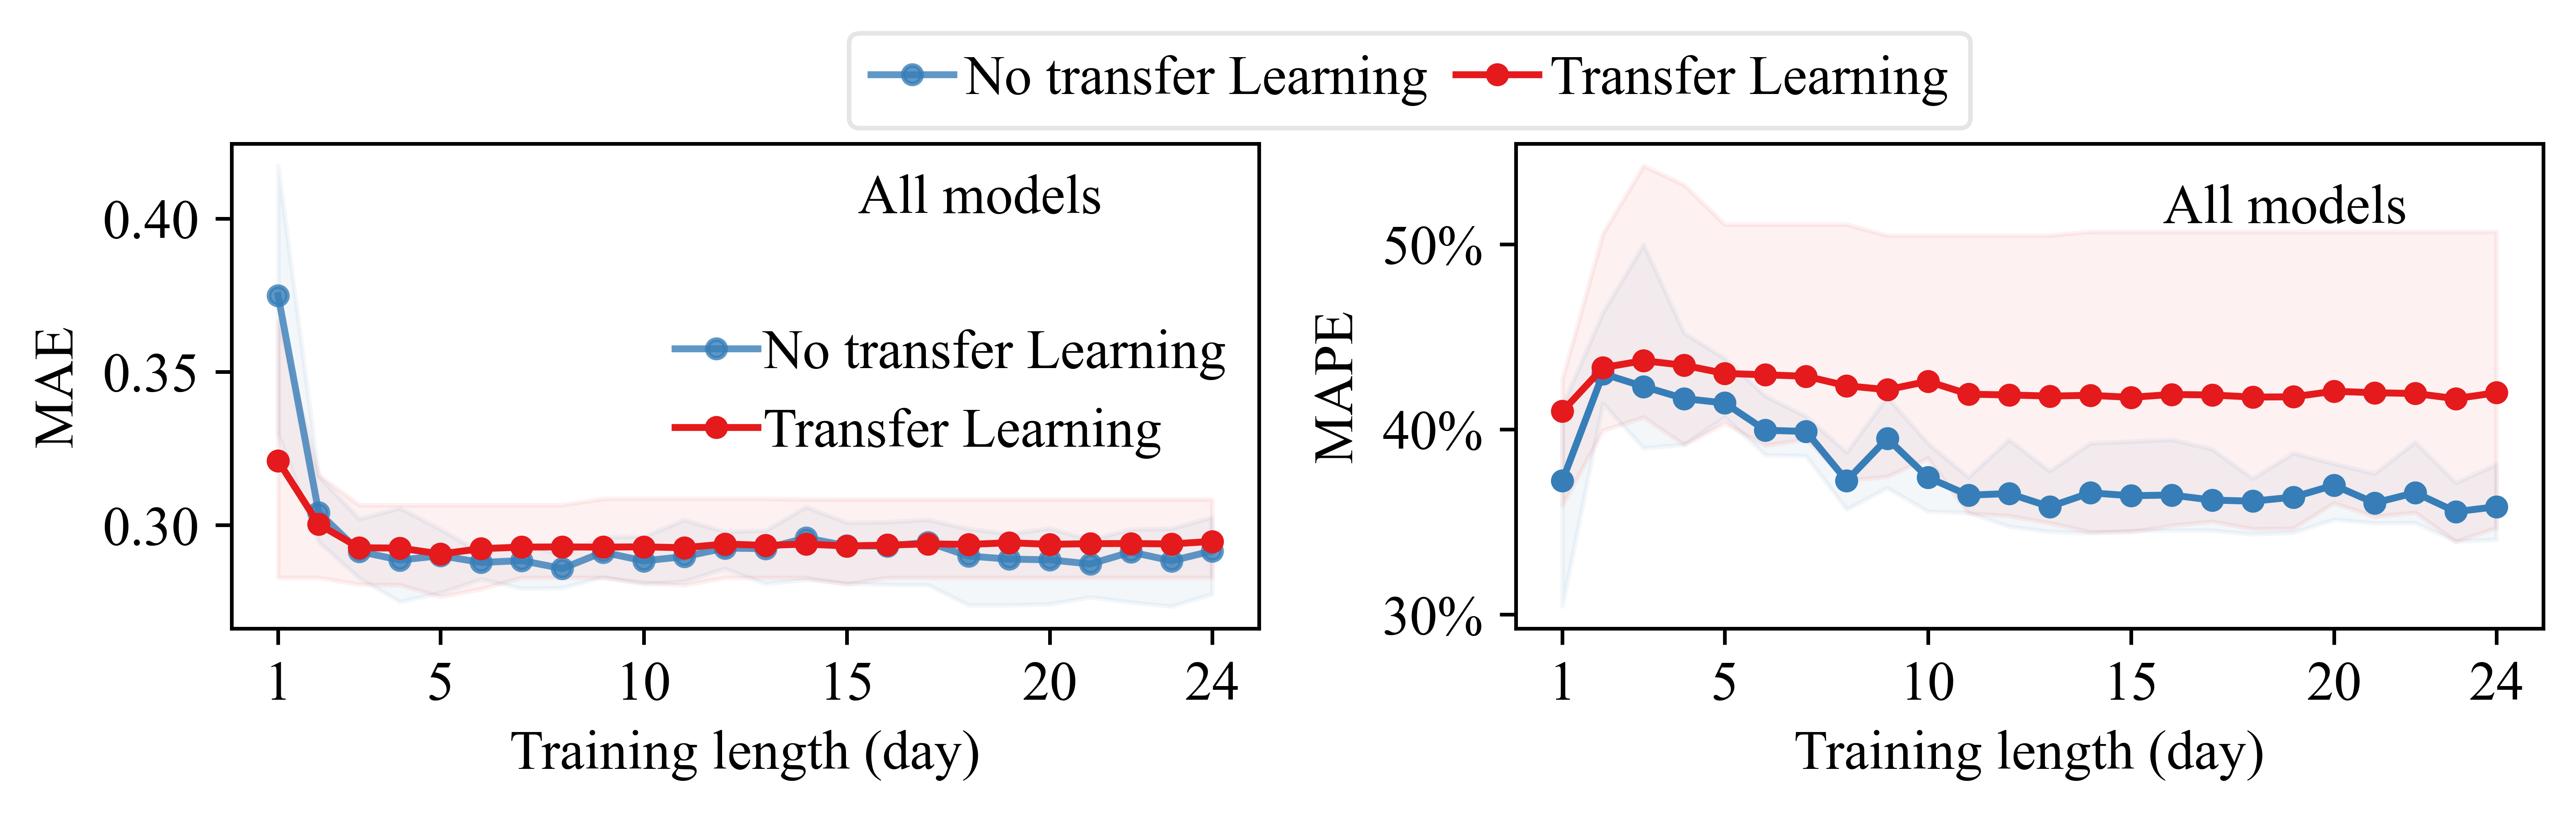

In [8]:
#Figure
fig=plt.figure(figsize=(9,3.8), dpi=800)
size=12
plt.rc('font',family='Times New Roman', size=size)
plt.subplots_adjust(left=None,bottom=None,right=None,top=None,wspace=0.25,hspace=0)
error_params1=dict(elinewidth=0.75,ecolor="black",capsize=5)
fillalpha=0.06
#figure 1 
ax=plt.subplot(aa,2,1)
#ax.set_facecolor(colour[overall])
ax.patch.set_alpha(set_alpha)
plt.plot(range(1,25),notransfer_data('mae',model_for,'mean'),color=colour[notrans],linestyle = "-",marker=".",markersize=markersize,
                linewidth=1.5,label='No transfer Learning',alpha=0.8)
plt.fill_between(range(1,25), notransfer_data('mae',model_for,'min'),  notransfer_data('mae',model_for,'max'),
                         color=colour[notrans],alpha=fillalpha)
plt.plot(range(1,25),transfer_data('mae',model_for,'mean'),color=colour[trans],linestyle = "-",marker=".",markersize=markersize,
                linewidth=1.5,label='Transfer Learning' )
plt.fill_between(range(1,25), transfer_data('mae',model_for,'min'), transfer_data('mae',model_for,'max'),
                         color=colour[trans],alpha=fillalpha)       
plt.title("All models",fontdict={'size':size},loc = 'left',x=.61,y=0.8)
plt.xticks([])
plt.ylabel('MAE')
plt.legend(loc="upper center" , bbox_to_anchor=(0.70, 0.72), ncol=1, framealpha=0, columnspacing=0.4,handlelength=1.5,handletextpad=0.1) 
plt.gca().yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2f'))
plt.xticks([1,5,10,15,20,24])
plt.xlabel("Training length (day)")

#figure 2
ax=plt.subplot(aa,2,2)
#ax.set_facecolor(colour[overall])
ax.patch.set_alpha(set_alpha)
plt.plot(range(1,25),notransfer_data('mape',model_for,'mean'),color=colour[notrans],linestyle = "-",marker=".",markersize=markersize,
                linewidth=1.5,)
plt.fill_between(range(1,25), notransfer_data('mape',model_for,'min'),  notransfer_data('mape',model_for,'max'),
                         color=colour[notrans],alpha=fillalpha)   

plt.plot(range(1,25),transfer_data('mape',model_for,'mean'),color=colour[trans],linestyle = "-",marker=".",markersize=markersize,
                linewidth=1.5, )
plt.fill_between(range(1,25), transfer_data('mape',model_for,'min'),  transfer_data('mape',model_for,'max'),
                         color=colour[trans],alpha=fillalpha)   
plt.xticks([])
plt.title("All models",fontdict={'size':size},loc = 'left',x=.63,y=0.78)
plt.ylabel('MAPE')
plt.gca().yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals=0))
plt.xticks([1,5,10,15,20,24])
plt.xlabel("Training length (day)") 
fig.legend(loc="upper center" , bbox_to_anchor=(0.52, 0.99), ncol=2, framealpha=0.5, columnspacing=0.5,handlelength=1.5,handletextpad=0.2)
fig.savefig('Figure3(d)(e).svg', format='svg',transparent=True, bbox_inches='tight', pad_inches=0.0)

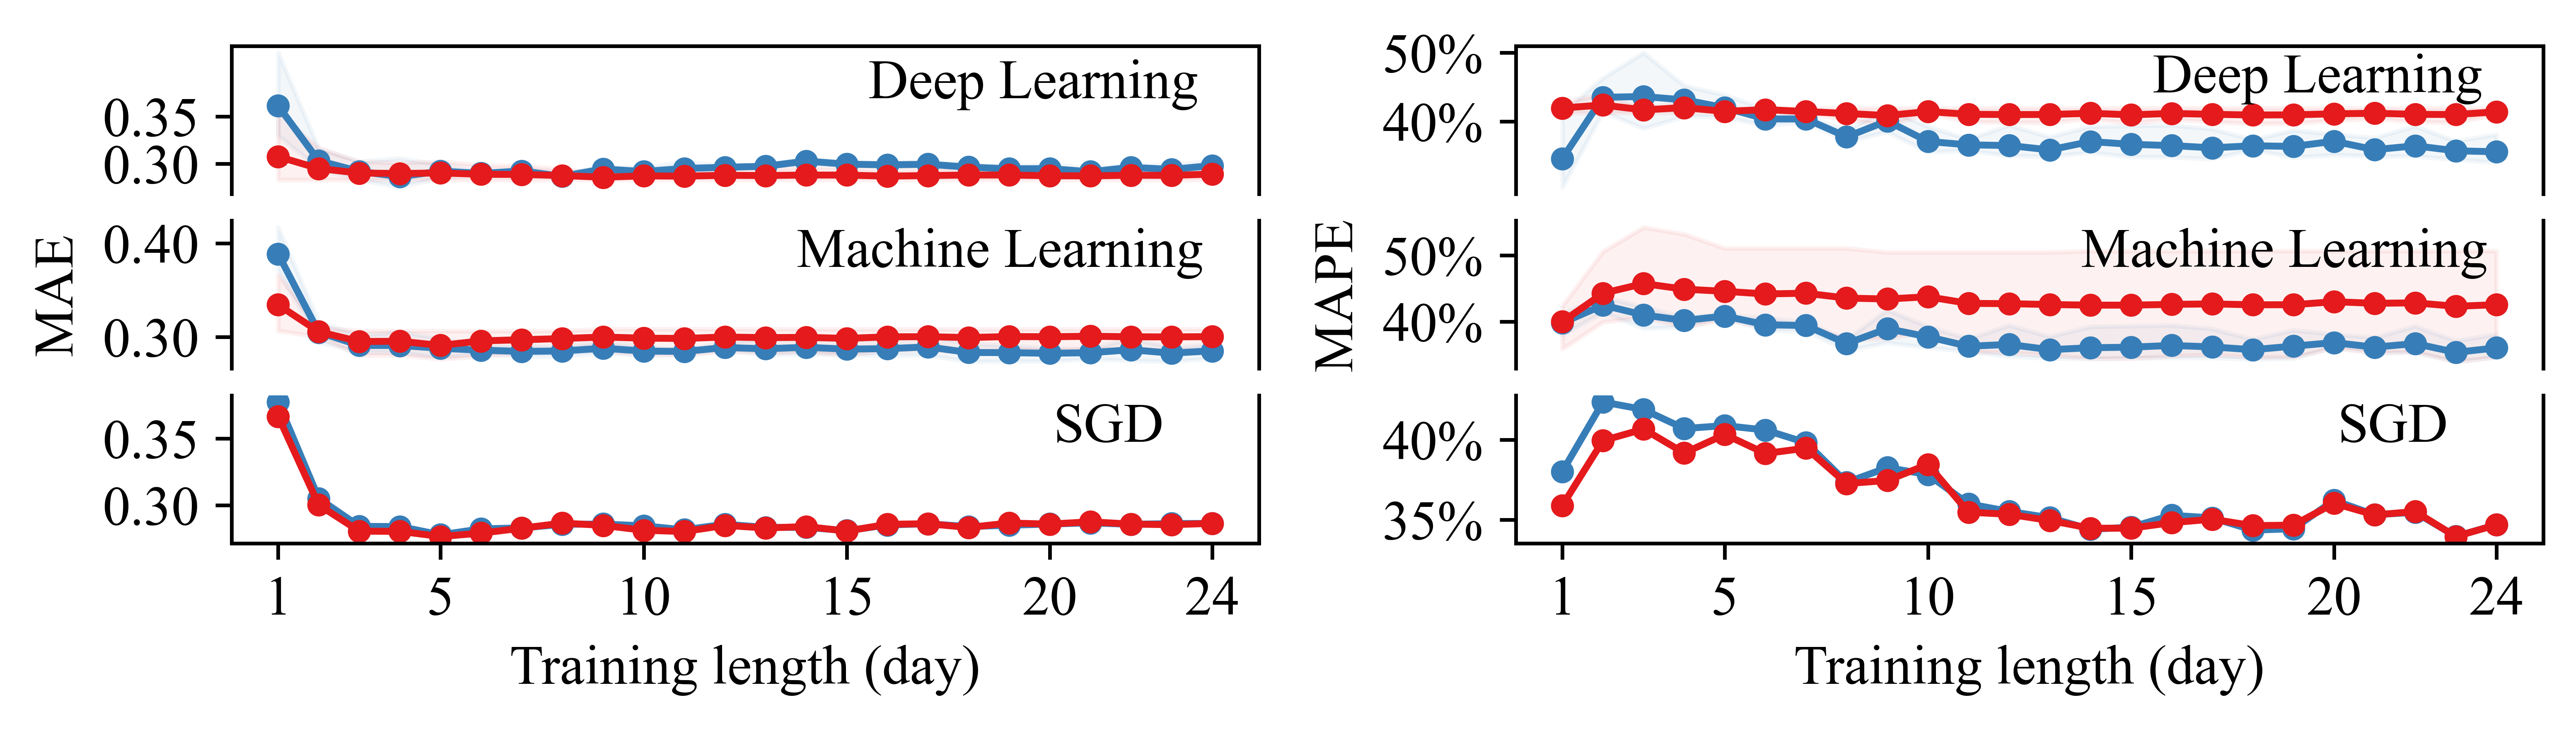

In [9]:
#figure 3 
fig=plt.figure(figsize=(9,4), dpi=800)
plt.rc('font',family='Times New Roman', size=size)
plt.subplots_adjust(left=None,bottom=None,right=None,top=None,wspace=0.25,hspace=0.18)
error_params1=dict(elinewidth=0.75,ecolor="black",capsize=5)
size=12
fillalpha=0.06

ax=plt.subplot(bb,2,7)
#ax.set_facecolor(colour[deep])
ax.patch.set_alpha(set_alpha) 
plt.plot(range(1,25),notransfer_data('mae',deepmodel,'mean'),color=colour[notrans],linestyle = "-",marker=".",markersize=markersize,
                linewidth=1.5,)
plt.fill_between(range(1,25), notransfer_data('mae',deepmodel,'min'),notransfer_data('mae',deepmodel,'max'),
                         color=colour[notrans],alpha=fillalpha)
plt.plot(range(1,25),transfer_data('mae',deepmodel,'mean'),color=colour[trans],linestyle = "-",marker=".",markersize=markersize,
                linewidth=1.5, )
plt.fill_between(range(1,25), transfer_data('mae',deepmodel,'min'),  transfer_data('mae',deepmodel,'max'),
                         color=colour[trans],alpha=fillalpha)
plt.gca().yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2f'))
plt.xticks([])
plt.yticks([0.3,0.35])
plt.title("Deep Learning",fontdict={'size':size},loc = 'left',x=.62,y=0.46)
#plt.ylabel('MAE')
#ax.spines['right'].set_visible(False)
#ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

#figure 4
ax=plt.subplot(bb,2,8)
#ax.set_facecolor(colour[deep])
ax.patch.set_alpha(set_alpha)
plt.plot(range(1,25),notransfer_data('mape',deepmodel,'mean'),color=colour[notrans],linestyle = "-",marker=".",markersize=markersize,
                linewidth=1.5,)
plt.fill_between(range(1,25), notransfer_data('mape',deepmodel,'min'), notransfer_data('mape',deepmodel,'max'),
                         color=colour[notrans],alpha=fillalpha)

plt.plot(range(1,25),transfer_data('mape',deepmodel,'mean'),color=colour[trans],linestyle = "-",marker=".",markersize=markersize,
                linewidth=1.5, )
plt.fill_between(range(1,25), transfer_data('mape',deepmodel,'min'),  transfer_data('mape',deepmodel,'max'),
                         color=colour[trans],alpha=fillalpha) 
plt.title("Deep Learning",fontdict={'size':size},loc = 'left',x=.62,y=0.5)
plt.xticks([])
plt.yticks([0.4,0.5])
#plt.ylabel('MAPE')
plt.gca().yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals=0))
#ax.spines['right'].set_visible(False)
#ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

#figure 5 
ax=plt.subplot(bb,2,9)
#ax.set_facecolor(colour[machine])
ax.patch.set_alpha(set_alpha) # 设置ax区域背景颜色透明度
plt.plot(range(1,25),notransfer_data('mae',machinemodel,'mean'),color=colour[notrans],linestyle = "-",marker=".",markersize=markersize,
                linewidth=1.5)
plt.fill_between(range(1,25), notransfer_data('mae',machinemodel,'min'),  notransfer_data('mae',machinemodel,'max'),
                         color=colour[notrans],alpha=fillalpha)

plt.plot(range(1,25),transfer_data('mae',machinemodel,'mean'),color=colour[trans],linestyle = "-",marker=".",markersize=markersize,
                linewidth=1.5)
plt.fill_between(range(1,25), transfer_data('mae',machinemodel,'min'), transfer_data('mae',machinemodel,'max'),
                         color=colour[trans],alpha=fillalpha)
plt.xticks(range(1,25,2))
plt.title("Machine Learning",fontdict={'size':size},loc = 'left',x=.55,y=0.50)
#ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
#plt.yticks([0.18,0.23])
plt.ylabel('MAE')
plt.xticks([])
plt.gca().yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2f'))

#figure 6
ax=plt.subplot(bb,2,10)
#ax.set_facecolor(colour[machine])
ax.patch.set_alpha(set_alpha) # 设置ax区域背景颜色透明度
plt.plot(range(1,25),notransfer_data('mape',machinemodel,'mean'),color=colour[notrans],linestyle = "-",marker=".",markersize=markersize,
                linewidth=1.5,)
plt.fill_between(range(1,25),notransfer_data('mape',machinemodel,'min'),  notransfer_data('mape',machinemodel,'max'),
                         color=colour[notrans],alpha=fillalpha)  
plt.plot(range(1,25),transfer_data('mape',machinemodel,'mean'),color=colour[trans],linestyle = "-",marker=".",markersize=markersize,
                linewidth=1.5, )
plt.fill_between(range(1,25), transfer_data('mape',machinemodel,'min'), transfer_data('mape',machinemodel,'max'),
                         color=colour[trans],alpha=fillalpha)   
plt.xticks(range(1,25,2))
plt.xticks([1,5,10,15,20,24])
plt.title("Machine Learning",fontdict={'size':size},loc = 'left',x=.55,y=0.5)
#ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.yticks([0.4,0.5])
plt.xticks([])
plt.ylabel('MAPE')
plt.gca().yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals=0))

#figure 7
ax=plt.subplot(bb,2,11)
#ax.set_facecolor(colour[sgd])
ax.patch.set_alpha(set_alpha) 
plt.plot(range(1,25),notransfer_data('mae',specialmodel,'mean'),color=colour[notrans],linestyle = "-",marker=".",markersize=markersize,linewidth=1.5,)
plt.plot(range(1,25),transfer_data('mae',specialmodel,'mean'),color=colour[trans],linestyle = "-",marker=".",markersize=markersize, linewidth=1.5,)
plt.xticks(range(1,25,2))
plt.title("SGD",fontdict={'size':size},loc = 'left',x=.8,y=0.5)
#ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#plt.yticks([0.18,])
#plt.ylabel('MAE')
plt.xticks([1,5,10,15,20,24])
plt.xlabel("Training length (day)")
plt.gca().yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2f'))

#figure 8
ax=plt.subplot(bb,2,12)
ax.patch.set_alpha(set_alpha) 
plt.plot(range(1,25),notransfer_data('mape',specialmodel,'mean'),color=colour[notrans],linestyle = "-",marker=".",markersize=markersize,
                linewidth=1.5,)
plt.plot(range(1,25),transfer_data('mape',specialmodel,'mean'),color=colour[trans],linestyle = "-",marker=".",markersize=markersize,
                linewidth=1.5, )
plt.title("SGD",fontdict={'size':size},loc = 'left',x=.8,y=0.5)
plt.xticks([])
plt.yticks([0.35,0.4])
#plt.ylabel('MAPE')
plt.gca().yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals=0))
#ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xticks([1,5,10,15,20,24])
plt.xlabel("Training length (day)")
plt.gca().yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals=0))
fig.savefig('Figure3(f)(g).svg', format='svg',transparent=True, bbox_inches='tight', pad_inches=0.0)
plt.show()